# Assignment 1
This section will introduce how we have structed our answers to the first assignement in the course *Social graphs and interactions* (02805). 

Each of the 5 part can be found as heading and is clearly marked as `Part x:`. Furthermore have each of the assigment for each part been marked with **bold** letters - that includue the exercises 3.1 from *Network Science Book*. In the cell below can a list of all libraries that have utilized be seen as they are imported. Moreover a seed is set to ensure reproduceability of the results (note that it is specified for all stochastic grahs that this seed shall be used). Please also note that $\log()$ refers to the natural logarithm. With these remarks - lets get hacking ;-)

<img src="https://img.youtube.com/vi/KEkrWRHCDQU/0.jpg" alt="image info" />

In [1]:
import networkx as nx
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

# Nice plots
import seaborn as sns; sns.set()
%matplotlib inline

# Use seed for reproducability
np.random.seed(42)

# Part 1: Binning degree distributions

In this part the properties of binning will be investigated. This is to show how binning in not necessarily trivial. Firstly it will be done on real numbers, then integers before moving onto degree distributions.

### Binning real numbers

**Let's do a gentle start and use the random library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.**

The parameters are defined and using `numpy`'s random module, 5000 random normal numbers are sampled (where it is remembered that `numpy` uses the standard deviation and not variance).

In [2]:
# Defining parameters
mu, sigma = 2, 0.125
n = 5000

# Generate numbers
s = np.random.normal(loc = mu, scale = sigma, size = n)

**Now, let's use numpy.histogram to bin those number into 10 bins. What does the numpy.histogram function return? Do the two arrays have the same length?**

From the documentation of the `numpy.histogram`-function it is seen that it has two outputs. It returns the count (frequency) for each bin as well as the bin edges. Below the function is used to extract counts and bins for 5000 sampled numbers.

In [3]:
counts, bins = np.histogram(s, bins=10)
print(f"The counts have length {len(counts)} and the bins have length {len(bins)}.")

The counts have length 10 and the bins have length 11.


From this it can be verified that the function returns the edges as it has one more value than the number of bins.

**Then we use matplotlib.pyplot.plot to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.**

The obtained bins and counts can not be plotted directly as they do not have the same length. Thus the data vectors have to be modified slightly. As `matplotlib.pyplot.plot` is drawing lines to connect the `x` and `y` inputs the lenght of these vectors can be determined. There have to be 10 horizontal lines corresponding to each bin as well as 9 vertical lines connecting them (between 1 and 2, between 2 and 3 etc.) This gives a total of 19 lines and as `x` and `y` are points they have to be 20 long. To *fix* for the bins (`x`) all the bin edges expect the first and large have to be repeated which is used to draw the vertical lines. As edge bin has to be represented by its two edges all counts values are repeated. Numpy has a function, `repeat`, that can carry out this exact operation which is done below:

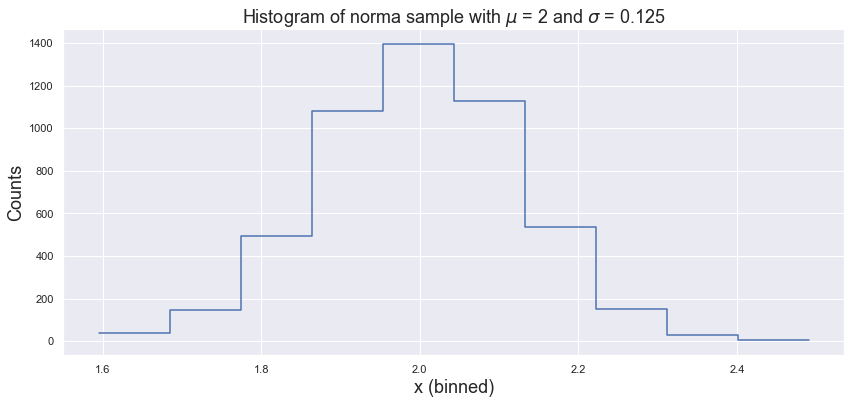

In [4]:
# Define x and y
x = np.repeat(bins, 2)[1:-1]
y = np.repeat(counts, 2)

# Plotting
plt.figure(figsize = (14,6))
plt.plot(x, y)
plt.title(f'Histogram of norma sample with $\mu$ = {mu} and $\sigma$ = {sigma}', fontsize = 18)
plt.xlabel('x (binned)', fontsize = 18)
plt.ylabel('Counts', fontsize = 18)
plt.show()

As expected, the histogram clearly indicates that the data points are from a Gaussian distribution. From the histogram the minimum and maximum value can also be seen. As all data points has to be included in a bin and the bins are the same width in this case it means that the bin widths can be calculated as $\frac{\max(s)-\min(s)}{n_{bins}}$, where $s$ is the data vector.

### Binning integers

**But binning real numbers into a fixed number of bins is easy when numpy.histogram does all the work and finds the right bin boundaries for you. Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out numpy also has some convenient random number generators. Use numpy.random.poisson to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers.**

The `numpy`-module `random` with the function `poisson` is used to sample the numbers - the minimum and maximum value are printed as they are relevant for later.

In [5]:
# Parameter definitions
lamb = 10
n = 5000

# Sample numbers
p = np.random.poisson(lam = lamb, size = n)
print(f"The maximum value is {max(p)} and the minimum value is {min(p)}.")

The maximum value is 24 and the minimum value is 1.


**Instead of simplify specifying the number of bins for numpy.histogram, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number. Use the vector by setting numpy.histogram's bin parameter as bin = $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.**

In order to do this it is important to remember that the Poisson distribution is discrete, meaning all outputs are integers. This means that the bin edges should be fractional, where halfes will be used in this case. What is desired as bin-edges is thus $\{\min{(p)}-0.5,\min{(p)}+0.5,\dots\max{(p)}+0.5\}$. This is created in Python with `np.arange` where it is remembered that the upper bound is excluded. That is why there is a $+2$ below in the creation of the bin edges. This is shown below where the edges are printed to verify that they fulfill the requirement.

In [6]:
v = np.arange(min(p),max(p)+2) - 0.5
print(v)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5]


With this list `numpy.histogram` can be used where this list is parsed to the function to do a *value count*. The $0.5$ has to be added to the vector `v` again so the bars fit with the integer values. The last value is also discarded as it now correspons to $\max{(p)}+1$. This is all shown below:

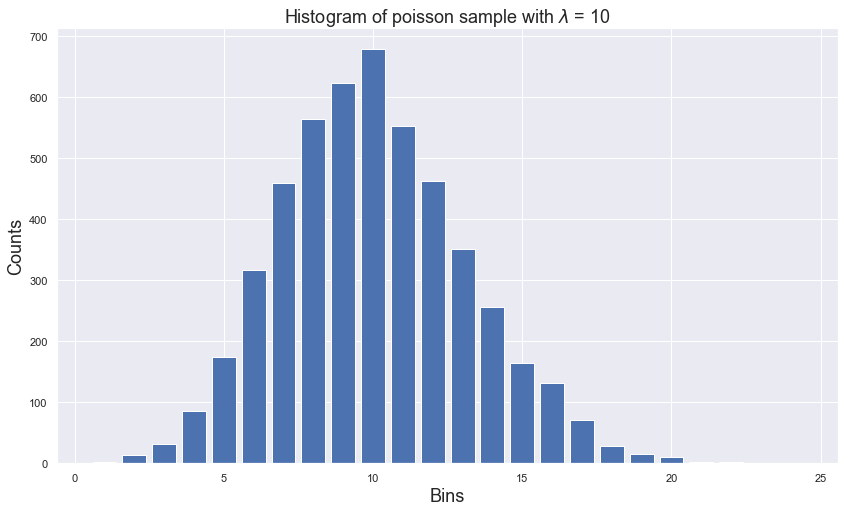

In [7]:
# Count occurences
counts, bins = np.histogram(a = p, bins = v)

# Plot results
plt.figure(figsize = (14,8))
plt.bar(x = v[:-1]+0.5, height = counts) # Adding 0.5 to ensure the bins are at integer values
plt.title(f'Histogram of poisson sample with $\lambda$ = {lamb}', fontsize = 18)
plt.xlabel('Bins', fontsize = 18)
plt.ylabel('Counts', fontsize = 18)
plt.show()

From the plot it can be seen quite clearly that the distribution is Poisson (even though it is approaching the normal cf. the Central Limit Theorem).

### Binning and plotting degree distributions

**Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. First we have to figure out which values the ER parameters (N and p) should assume. It's easy to see that $N = 5000$, but how do you find $p$?**

From [1, eq. (3.3)] it is know that $\langle k \rangle = p (N-1)$. In this equation $p$ can be isolated and results in the following expression:
$$p = \frac{\langle k \rangle}{N-1}.$$
As the mean, which is $\langle k \rangle$, in the Poisson distribution is equal $\lambda$ the values can easily be inserted and it this specific case it yields:
$$p = \frac{10}{4999}.$$

**Now, use networkx to create the graph and extract the degree distribution.**

The value found above is inserted together with $N$, and using `networx` it is very easy to create the graph as follows:

In [8]:
G = nx.erdos_renyi_graph(n = 5000, p = 10/4999, seed=np.random)

**Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.**

The degrees is firstly extracted with a list comprehension as the node indicies are irrelevant for this problem. The same technique used in "Binning integers" is used to visualise the degree distribution.

The minimum degree is 1 and the maximum degree is 24


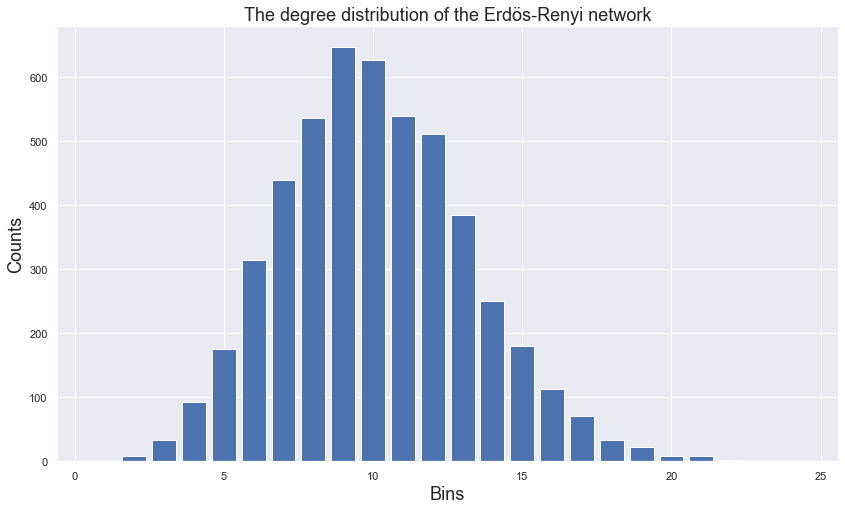

In [9]:
# Exrtract degree distirbution
degree_dist = np.array([e for n, e in G.degree()])

# Calculate value counts
d = np.arange(min(degree_dist),max(degree_dist)+2) - 0.5
print(f"The minimum degree is {min(degree_dist)} and the maximum degree is {max(degree_dist)}")
counts, bins = np.histogram(a = degree_dist, bins = d)

# Plot result
plt.figure(figsize = (14,8))
plt.bar(x = d[:-1]+0.5, height = counts) # Adding 0.5 to ensure the bins are at integer values
plt.xlabel('Bins', fontsize = 18)
plt.ylabel('Counts', fontsize = 18)
plt.title('The degree distribution of the Erdös-Renyi network', fontsize = 18)
plt.show()

A very similar plot to before is obtained. Once again it is seen that the distribution is approaching a normal distribution but from the skewness it is still seen that distribution is in fact Poisson. Moreover the maximum and minimal value is also very similar compared to the "Binning Integers" part.

# Part 2: Random networks and plotting in networkx

### In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

Consider an Erdős-Rényi network with $N = 3000$ nodes, connected to each other with probability $p = 10^{–3}$.

**What is the expected number of links, $\langle L \rangle$?**

The expected number of links is determined using the following formula $$\langle L \rangle = \frac{pN(N-1)}{2}.$$

In [10]:
# Definie parameters
N = 3000
p = 10**(-3)

# Expected value of L
E_L = (p*N*(N-1))/2
print(f"The expected number of links for the Erdös-Rényi network is {E_L}.")

The expected number of links for the Erdös-Rényi network is 4498.5.


**In which regime is the network?**

A characteristic of a random network is which regime the network belong to. There are four topologically distinct regimes [1, chap 3.6] based on the average degree of all nodes. The four regimes are defined as follows:
* **Subcritical Regime:** $0 < \langle k \rangle < 1$
 
* **Critical Point:** $\langle k \rangle = 1$
 
* **Supercritical Regime:** $\langle k \rangle > 1$
 
* **Connected Regime:** $\langle k \rangle > \log(N)$
 
In order to determine which regime the network belongs to, the average degree $\langle k \rangle$ can be calculated using $$\langle k \rangle = p(N-1),$$ which is done below:

In [11]:
k = p*(N-1)
print(f"The average degree of the network is {k}.")

The average degree of the network is 2.999.


To determine if the network is in the Supercritical Regime or Connected Regime it has to be compared to $\log(N)$, which is calculate below:

In [12]:
print(np.log(N))

8.006367567650246


It can thus be concluded that the network belongs to the supercritical regime since $\log(N) > \langle k \rangle > 1.$
 
That the network belongs to the supercritical regime means that the network is very close to a real network [1, chap 3.7], since the giant component looks like a network. Several isolated components coexist with the giant component as smaller trees while the giant component contains both loops and cycles.

**Calculate the probability $p_c$ so that the network is at the critical point.**

For the network to be at the critical point the average degree, $\langle k \rangle$, needs to be equal to 1 cf. [1, chap 3.6]. The probability $p_c$ can be calculated using [1, eq. (3.3)] as follows:

 $$p_c = \frac{\langle k \rangle}{N-1} = \frac{1}{N-1}.$$

In [13]:
print(f'For the network to be at the critical point, the probability must be {1/(N-1):.7f}.')

For the network to be at the critical point, the probability must be 0.0003334.


Naturally the probability has to be lower than before where the network was in the Supercritical Regime.

**Given the linking probability $p = 10^{-3}$, calculate the number of nodes $N^{cr}$ so that the network has only one component.**

In order to only have one component the network needs to be in fully connected domain which is achived at
$$\langle k \rangle  \; \geq \;  \log(N) \Leftrightarrow p \geq \frac{\log(N)}{N}$$
 
So we have to determine
\begin{align}
    P &= \frac{\log(N)}{N} \\
      &\Updownarrow \\
    N &= \exp(-W(-P))
\end{align}

where $W$ is the product log function (also known as Lambert $W$ function). To avoid dealing with this it is instead achived by simply checking when $p \geq \frac{\log(N)}{N}$. This is done by creating a vector of $N$'s from 1 to 10000 and check all the inequalities. Trivially 1 will be a solution (as $np.log(1)/1=0$) and it also makes sense that if a network contains one node it is fully connected. There is though also a solution for a larger $N$ why the two first values, where the inequality holds are returned:

In [14]:
# Check all numbers up to 10000
N = np.arange(1,10000)
p_cr = 10**(-3)
values = np.log(N)/N

idx = np.where(p_cr > values)[0][0:2] + 1 #+1 due to N range starting at 1
print(idx) 

[   1 9119]


As expected 1 is returned but it is also seen that 9119 fulfill it as the lowest $N$ greater than 1 - thus $N^{cr}=9119$. This is also illustrated graphically below, where it should be noted, that the y-axis is log.

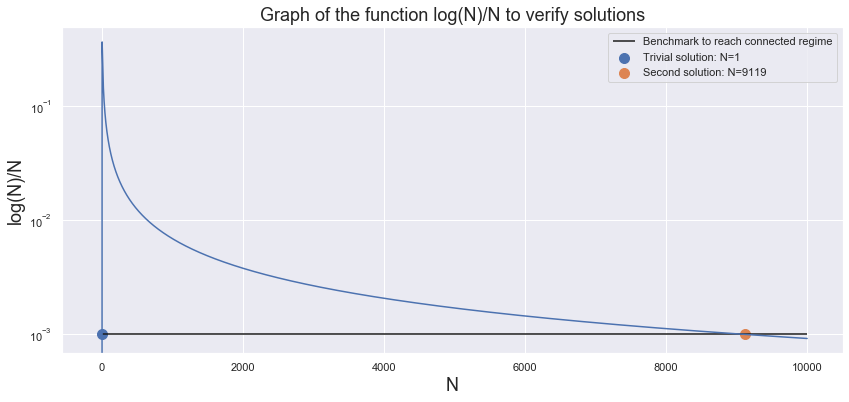

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(values)
plt.hlines(0.001,1, 10000, label = "Benchmark to reach connected regime")
plt.scatter(idx[0], p_cr, s=100, label = "Trivial solution: N={0}".format(idx[0]))
plt.scatter(idx[1], p_cr, s=100, label = "Second solution: N={0}".format(idx[1]))
plt.legend()
plt.xlabel("N", fontsize = 18)
plt.ylabel("log(N)/N", fontsize = 18)
plt.title("Graph of the function log(N)/N to verify solutions", fontsize = 18)
plt.yscale('log')
plt.show()

**For the network in (d), calculate the average degree $\langle k^{cr} \rangle$ and the average distance between two randomly chosen nodes $\langle d \rangle$.**

The average degree can with [1, eq. (3.3)] be calculated by $$\langle k^{cr} \rangle = p^{cr}(N^{cr}-1),$$ and the average distance is defined as $$\langle d \rangle = \frac{\log(N^{cr})}{\log(\langle k^{cr} \rangle)},$$
as seen in [1, eq. (3.19)]. The particular values is calculated below:

In [16]:
N_cr = 9119
k_cr = p_cr*(N_cr-1)

d_cr = np.log(N_cr)/np.log(k_cr)
print(f"The average degree of the network above is {k_cr}, \nand the average distance between two randomly chosen nodes is {d_cr:.2f}.")

The average degree of the network above is 9.118, 
and the average distance between two randomly chosen nodes is 4.13.


Now a much greater degree is obtained which makes sense as the network now is in the Connected Regime.

**Calculate the degree distribution $p_k$ of this network (approximate with a Poisson degree distribution).**

Following [1, box 3.11] the degree distribution on Poisson form is defined as $$p_{k^{cr}} = \exp(-\langle k^{cr}\rangle)\frac{\langle k^{cr} \rangle^{k^{cr}}}{k^{cr}!}.$$ 
The theoretical degree distribution for each $k^{cr}$ can be calculated from this, which is done below for $k^{cr}\in\{0,1,\dots,24\}$, and it is illustrated as a histogram with integer bins.

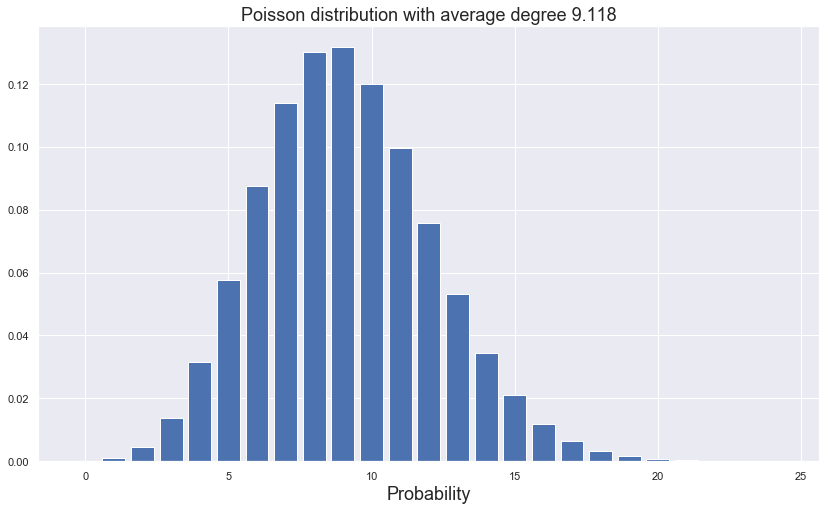

In [17]:
maxi = 25 #Max value

# Calculated all probabilities
p_k = [np.exp(-k_cr)*(k_cr**k)/(np.math.factorial(round(k))) for k in range(maxi)]

# Plotting
plt.figure(figsize = (14,8))
plt.bar(x = range(maxi), height = p_k)
plt.xlabel("k", fontsize = 18)
plt.xlabel("Probability", fontsize = 18)
plt.title(f"Poisson distribution with average degree {k_cr}", fontsize = 18)
plt.show()

### Paths. Plot a random network with 200 nodes and an average degree of 1.5.

It is given that $N=200$ and $\langle k \rangle = 1.5$. To make a random network the probability, $p$, needs to be determnined. This is done from the expression for the average degree ([1, eq. (3.3)]): $$\langle k \rangle = p(N-1)\Leftrightarrow p = \frac{\langle k \rangle}{N-1}=\frac{1.5}{200-1}$$

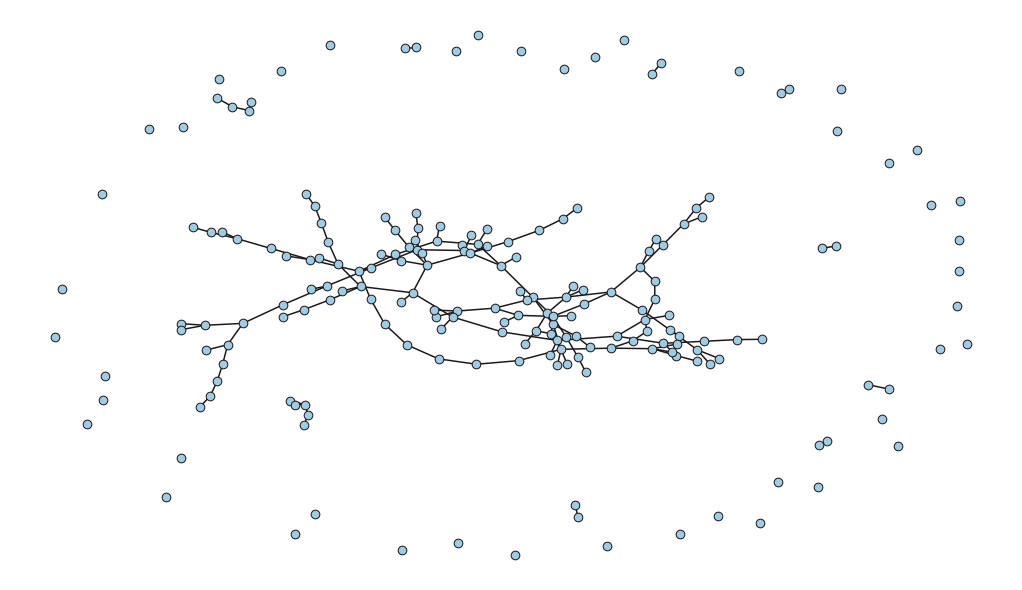

In [18]:
# Set parameters
N = 200
k = 1.5
p = k/(N-1)

# Generate graph
G_er = nx.erdos_renyi_graph(N, p, seed=np.random)

# Plot
plt.figure(figsize = (14, 8))
nx.draw_spring(
    G = G_er, 
    node_size = 75, 
    node_color = '#A0CBE2', 
    node_shape = 'o',
    edge_color = 'k',
    with_labels = False, 
    width = 1.5, 
    edgecolors='k') 
plt.show()

From the visualisation of the graph it definitely looks to be in the Supercritical Regime (comparing to [1, image 3.7]) ,where it has the Giant Connected Component in the middle. This component is extracted in the following exercise. 

**Extract the Giant Connected Component, GCC**

Below the Giant Connected Components is extracted by taking the connected component with most nodes. It is also illustrated below:

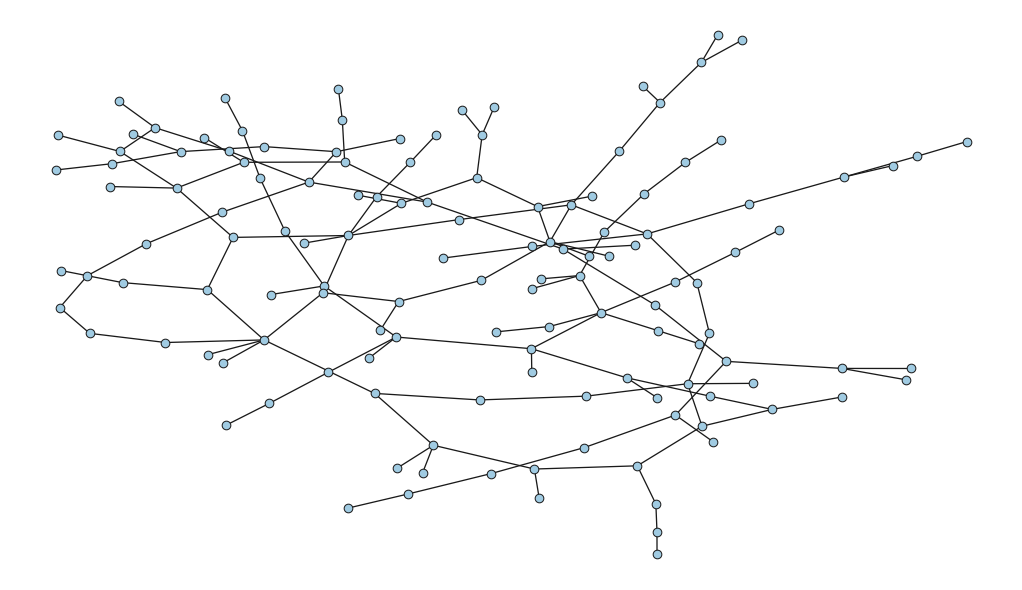

In [19]:
# Extract largest connected component
con_comp = sorted(nx.connected_components(G_er), key = len, reverse = True)
GCC = G_er.subgraph(con_comp[0]).copy()

# Drawing the GCC
plt.figure(figsize = (14, 8))
nx.draw_spring(
    G = GCC, 
    node_size = 75, 
    node_color = '#A0CBE2', 
    node_shape = 'o',
    edge_color = 'k',
    with_labels = False, 
    width = 1.3, 
    edgecolors='k') 
plt.show()

**Choose a node at random from the GCC.**

Using `numpy.random.choice` a random node from the GCC is chosen with uniform probability.

In [20]:
random_node = np.random.choice(G_er.subgraph(GCC))
print(f"The random node has index {random_node}.")

The random node has index 99.


### **Find all nodes that are precisely 2 steps away from that node.**

`NetworkX` has a function called `single_source_shortest_path_length` that can calculate the shortest path to all nodes from a given source node. Setting the source node as the random node found above and a `cutoff` of 2 all nodes with a maximum distance of 2 to the source node can be found. Afterwards the nodes that are *exactly* 2 steps away from the source node is found.

In [21]:
# Extract all nodes within 2 steps away from the random node
max_two_steps = nx.single_source_shortest_path_length(GCC, random_node, cutoff = 2)

# Find nodes that are exactly 2 steps away
two_steps = np.array([node for (node, steps) in max_two_steps.items() if steps == 2])
print(f"The nodes that are precisely 2 steps from the random node are {two_steps}.")

The nodes that are precisely 2 steps from the random node are [193 170  45  21].


**Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2").**

Now the indicies of the nodes has to be found. The tricky part here is that the indicies from the original graph is kept while the relevant indicies are the ones found in the GCC subgraph. This is solve with `numpy.in1d`as seen below:

In [22]:
nodes = np.array(list(GCC.nodes))
idx_random_node = np.where(nodes == random_node)[0]

# Find the corresponding indicies for the subgraph so they can be colored correctly
idx_two_step = np.where(np.in1d(nodes,two_steps))[0]

Now the only thing missing is to change the color of the nodes found above and plot it:

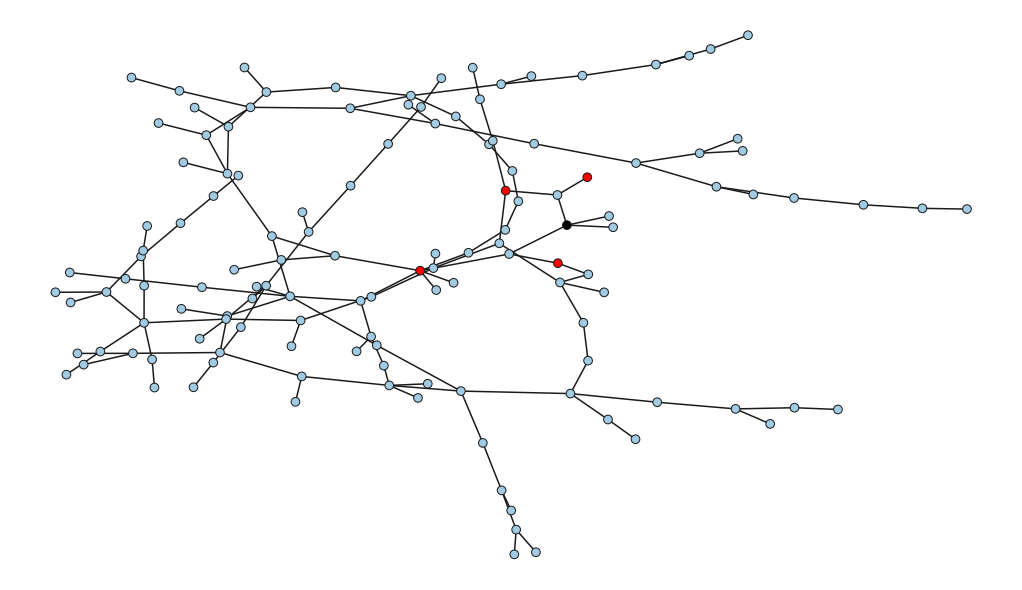

In [23]:
# Set node colors
node_colors = np.array(['#A0CBE2'] * len(GCC))
node_colors[idx_random_node] = '#000000'
node_colors[idx_two_step] = "#ff0000"

# Draw graph
plt.figure(figsize = (14,8))
nx.draw(
    G = GCC, 
    node_size = 75, 
    node_color = node_colors, 
    node_shape = 'o',
    edge_color = 'k',
    with_labels = False, 
    width = 1.5, 
    edgecolors='k') 
plt.show()

It looks great and it can easily be verified that the red nodes are those exactly two steps from the source node, that is black.

# Part 3: Watts-Strogatz Networks

In this part *Watts-Strogatz Networks* will be investigated. Watts-Strogatz Networks is an extension to the random network model that takes care of the two following properties seen in real networks [1, chap 3]:

1) The **Small World Property** that states the average distance between any two nodes should depend logaritmically on $N$, where $N$ is the total number of nodes in the network. This can be related to the *six degrees of seperation* where just a few connections between persons from Denmark to the United states means that many Danes only requires a few links to get to most people in the United States. 

2) **High Clustering** that states the clustering coefficient of real networks is much greater than what is seen in random networks of the same size. This can be related to the fact that e.g. in a real social network there is a greater probability than random that the friends of a given person also being friends (which is what the clustering coefficient calculates).

To make a Watts-Strogatz Network the number of nodes an edges have to be defined. As with a random netowrk it takes the parameters $N$ for the total number of nodes while $k$ indicates the degree for each node. As the extension a parameter $p\in[0;1]$ also has to be set. Setting $p=0$ leads to a regular network where the nodes are connected to their $k$ nearest neighbors. This is illustrated below with a simple example where $N=16$ and $k=2$.

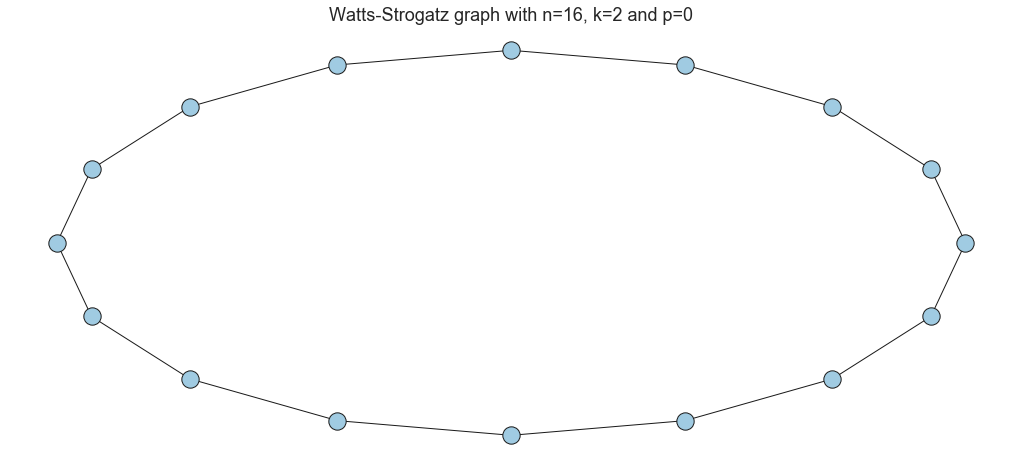

In [24]:
# Generate graph
G = nx.watts_strogatz_graph(16, 2, 0, seed=np.random)

# Plot
plt.figure(figsize = (14,6))
nx.draw(
    G = G,
    pos = nx.circular_layout(G),
    node_size = 300, 
    node_color = "#A0CBE2", 
    edgecolors = "k")
plt.title("Watts-Strogatz graph with n=16, k=2 and p=0", fontsize = 18)
plt.show()

What $p$ actually indicates is the probability of *rewiring* a given edge to a random node. This means that when the probability $p$ increases, the network approaches a random network which is the case when $p=1$. The small-world phenomena is seen as $0<p<1$ as some nodes will rewire and not only be connected to the neighbours. This is what is investigated in the following exercises below:

**Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and } 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.**

In the code cell below the task is carreid out with `networkX` where three graphs are created and the average shortest path length for each of three graphs are calculated. Afterwards the three graphs are plotted and shown with their average shortest path length.

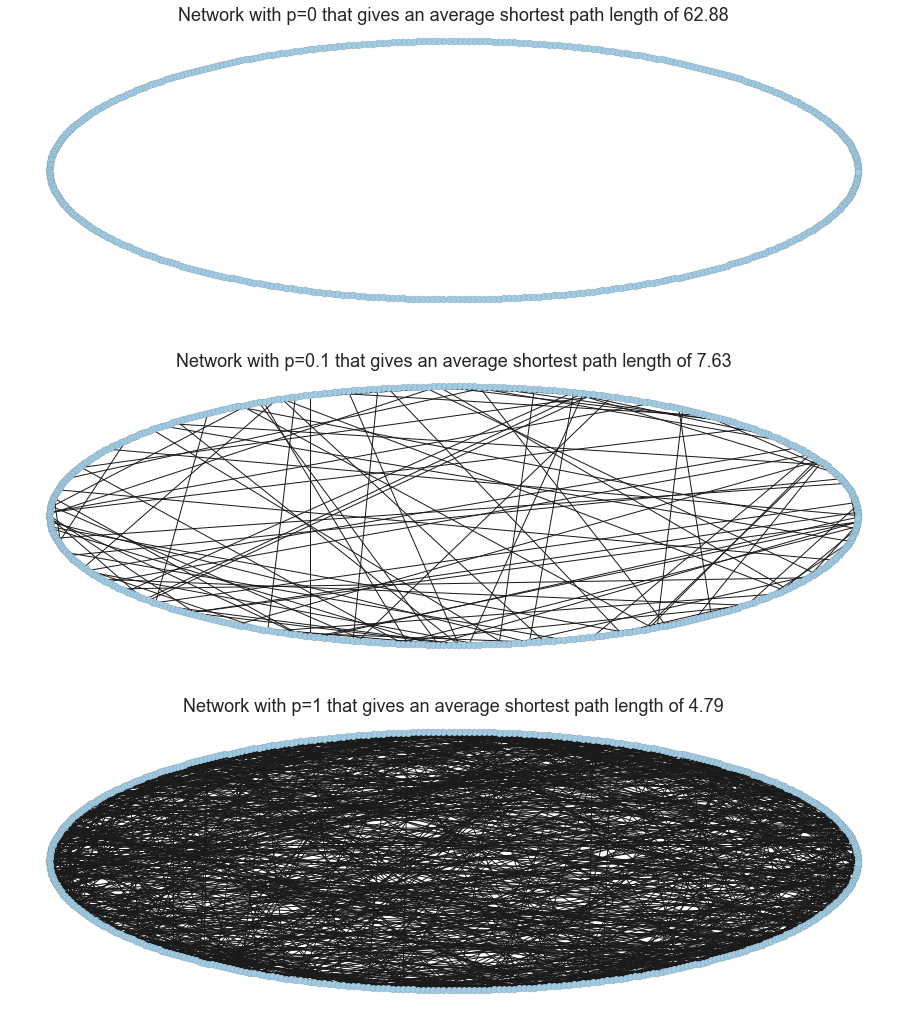

In [25]:
# Set parameters
n = 500
k = 4
p_list = [0,0.1,1]

# Create graphs
WSgraphs = [nx.watts_strogatz_graph(n, k, p, seed=np.random) for p in p_list]

# Calculate average shortest path
avg_shortest = [nx.average_shortest_path_length(graph) for graph in WSgraphs]

# Plot all three graphs
fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (16,18))
ax = axes.flatten()
for i,graph in enumerate(WSgraphs):
    nx.draw(graph, pos = nx.circular_layout(graph), node_size = 50, node_color = "#A0CBE2", edgecolors = "k", linewidths = 0.1, ax=ax[i])
    ax[i].set_title(f"Network with p={p_list[i]} that gives an average shortest path length of {avg_shortest[i]:.2f}", fontsize = 18)
plt.show()

By starting from the top:
* $p=0$: What is seen here is very similar to what was seen in the example further up. As $k = 4$ it means that each node is connected to its two neighbours - this can though be a bit hard to see as $N = 500$. One can though verify that no links goes "across" the graph. An average shortest path length of 62.88 is obtained.
* $p=0.1$: Now it becomes very clear what the Watts-Strogatz model actually does. A few links (as p still is quite low) are now connecting nodes that are not close neighbours. Even though $p$ only is 0.1 the average shortest path length has dropped to 7.63. This is due to the fact that by using some of these *cross links* the path lenghts can drop significantly.
* $p=1$: A random network is now obtained which can be seen due to the vast number of links connecting nodes that are not close neighbours. This leads to a further drop in the average shortest path length to only 4.79. 

**Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.**

The same $n$ and $k$ as above is used. The new p-list is defined and as well as the number of networks per $p$. In order to calculate all average shortest path lengths a list comprehension is used which afterwards is converted to a 2d-numpy array. Using the array the mean and standard deviation for each $p$ can be calculated.

In [26]:
# New p-list
p_list = [0,0.01,0.03,0.05,0.1,0.2]

# Number of repetitions
N = 50

# Store all results in a 2d numpy array
WSgraphs_avg_shortest = np.array([
    nx.average_shortest_path_length(nx.watts_strogatz_graph(n, k, p, seed=np.random)) 
    for p in p_list for j in range(N)
    ]).reshape(-1,N)

# Calculate mean and standard deviation
mean_list = np.mean(WSgraphs_avg_shortest, axis = 1)
std_list = np.std(WSgraphs_avg_shortest, axis = 1)

Using the results obtained above this can be plotted as shown below:

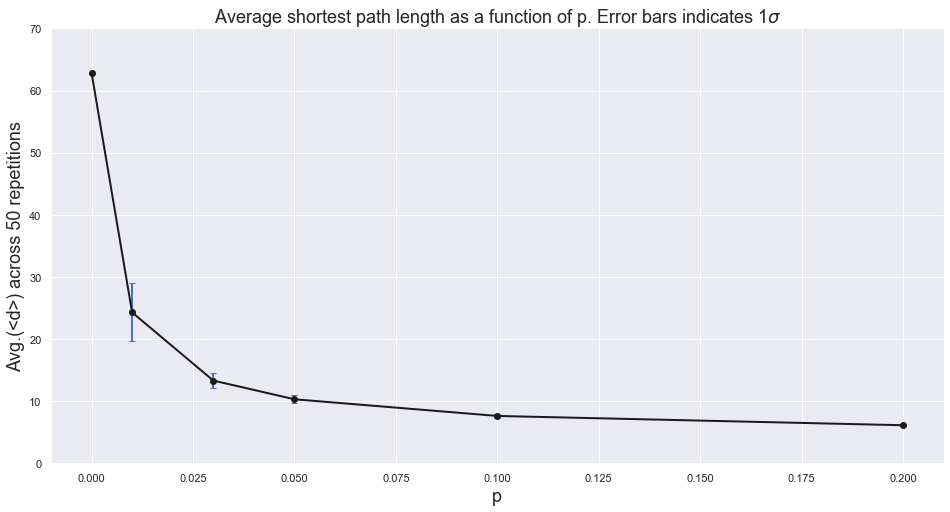

In [27]:
plt.figure(figsize = (16,8))
plt.errorbar(x = p_list, y = mean_list, yerr=std_list, lw = 2, fmt = "-o", ecolor = "b", capsize = 3, color = "k")
plt.title(r"Average shortest path length as a function of p. Error bars indicates 1$\sigma$", fontsize = 18)
plt.xlabel("p", fontsize = 18)
plt.ylabel(f"Avg.(<d>) across {N} repetitions", fontsize = 18)
plt.ylim((0,70))
plt.show()

From the plot it can clearly be seen how drastic the average shortest path lenght drops - it looks exponential decaying. More over it is also interesting to notice the variation in standard deviation as seen from the error bars. The exact figures are printed below as a dict:

In [28]:
print("Standard deviation as a function of p:")
dict(zip(p_list, std_list))

Standard deviation as a function of p:


{0: 7.105427357601002e-15,
 0.01: 4.663069043905908,
 0.03: 1.2602356621104491,
 0.05: 0.6625730244451044,
 0.1: 0.3089266405678974,
 0.2: 0.10647355201143724}

Firstly it is noted that for $p=0$ a standard deviation around the machine epsilon is obtained. This is though not very unsuprising as the graph is deterministic when $p=0$. The mean value of just around $500/8=62.5$ makes perfect sense; there is a distance of 1 between two nodes that are not directly neighbours in the circle. The means it takes $n/(2\cdot2)$ steps to reach the furthest point in the graph. The second "2" comes from the fact it is a circle and there is only $n/2$ to the furthest point. This is though to the furthest away node. On average only a fourth of the circle has to be traversed and remembering that $k=4$ leads to jump of two the $500/8=62.5$ is obtained. As there still is a distance of 1 to the direct neighbours the actual figure is just above the 62.5.

Setting $p=0.01$ the standard deviation grows quite large. This is not surprising as setting $p=0.01$ means that the expected number of edges that is rewired is $p\cdot n\cdot k/2 = 10$. This low number introduces massive uncertainty. If they end up being rewired to nodes still very close the average shortest path lengths still ends up being quite far. On the opposite if a few of these *cross* the whole graph the average shortest path length can take a large drop. Usign this reasoning the lower standard deviation for larger $p$'s can be deducted. As more edges are rewired the probability that getting the *key edges* that traverse the network increasing brings the uncertainty down. For $p=0.2$ it is seen that the standard deviation drops to around $0.1$ with a mean values of around 6.

# Part 4. The Barabasi-Albert Model

A different type of graph model will now be investigated - more specifically the Barabasi-Albert Model. What makes this model different is the fact that all nodes do not exist to start with. Instead the nodes are added iteratively. In this part a special version of the Barabasi-Albert model will be used, where the graphs are generated as follows [1, chap5]:

1) Start of with a graph consisting of two nodes that are both connected.

2) Add a new node and connect it to only one of the existing nodes. The probability of the new node connecting to node $i$ is given as $k_i/\sum_j k_j$. Or to explain it in English; the greater the degree of a given node is the greater the probability is that a new node will be connected to that given node.

3) Repeat 2) until a desired total number of nodes is reached.

A function, `create_BA_graph`, has been implemented below which follows the algorithm described above:

In [29]:
# Number of total nodes
def create_BA_graph(total_nodes):
    # Init graph
    G = nx.Graph()
    G.add_edge(0, 1)
    
    # Add nodes and edges
    nodes_to_add = np.arange(2, total_nodes)
    for node in nodes_to_add:
        connect_to = np.random.choice(a = [k for k,v in G.degree], 
                                      p = [v for k,v in G.degree]/np.sum([v for k,v in G.degree]))
    
        G.add_edge(node, connect_to)
    
    return G

**Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.**

To do this the function above is used and the resulting graph can easily be plotted using `networkX` as seen below:

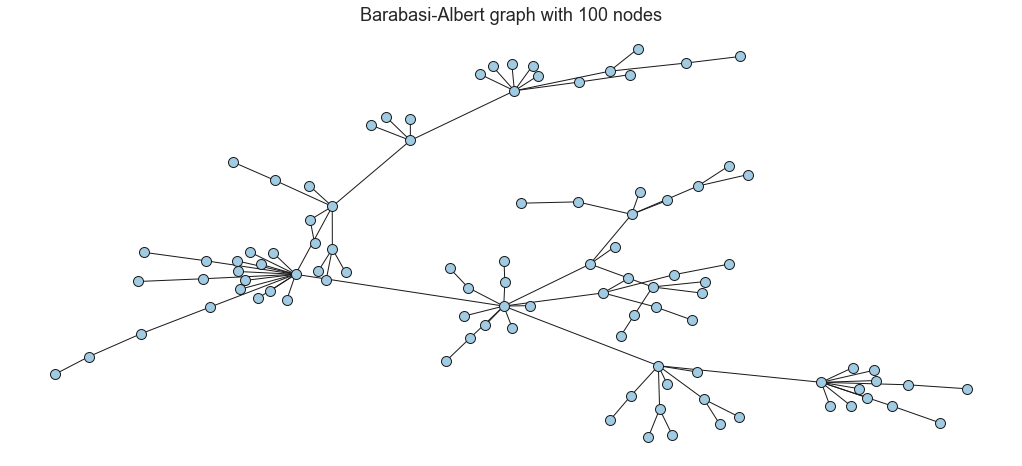

In [30]:
# Create BA network with 100 nodes
G_BA100 = create_BA_graph(total_nodes = 100)

# Draw it
plt.figure(figsize = (14,6))
nx.draw(
    G_BA100, 
    node_size = 100, 
    node_color = "#A0CBE2", 
    edgecolors = "k")
plt.title("Barabasi-Albert graph with 100 nodes", fontsize = 18)
plt.show()

From the plot it becomes clear that this particular graph generating method leads to a *forest*, which is an undirected graph in which any two vertices are connected by at most one path. This makes perfect sense as each new node only connects to a single node and as such cycles can never appear. Another property is that there are quite a few *hubs* and thus also many nodes with degree 1. As the number of edges is constant at $n-1$, where $n$ is the total number of nodes, it is clear having hubs must also lead to nodes with degree 1. Having hubs is also expected as the probability of new nodes connecting to hubs are larger given the algorithm. This will lead to a few nodes having very high degree while many nodes will have degree 1. This is investigated below:

**Now create a 5000 node network. What's the maximum and minimum degree? Now, bin the degree distribution, for example using `numpy.histogram`. Plot the distribution. Plot it with both linear and log-log axes.**



Using the `create_BA_graph` function as before a BA model with 5000 nodes is created.

In [31]:
# Create BAgraph with 5000 nodes
G_BA5000 = create_BA_graph(total_nodes = 5000)

In order to calculate the minimum and maximum degree the inbuilt method `.degree` in `networkX` is used:

In [32]:
# Calculate minimum and maximum degree and print results
minD = np.min(np.min([v for k,v in G_BA5000.degree]))
maxD = np.max(np.max([v for k,v in G_BA5000.degree]))
print(f"The minimum degree is {minD} and the maximum degree is {maxD}.")

The minimum degree is 1 and the maximum degree is 256.


It is expected to obtain a minimum degree of 1 as discussed above in the example with 100 nodes. It will actually always be 1 as the final node added only will have one connection. It is seen that there is a very large hub with degree 256 - this is a result of the way the graph is created and it will be even more clear below. Here, the distribution is binned with the same method as in part 1. The frequency of nodes with a given degree is then showed. To the left with linear axis and to the right with log axis.

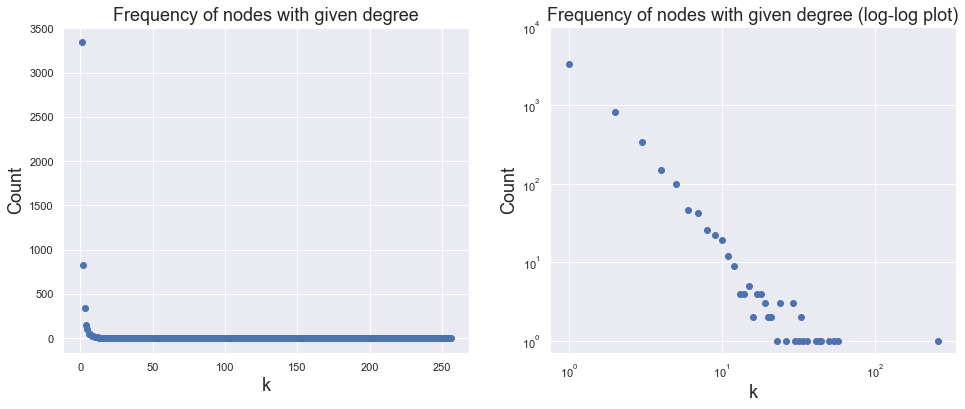

In [33]:
# Bin the distribution
v = np.arange(minD, maxD+2) - 0.5
counts = np.histogram([v for k,v in G_BA5000.degree], bins = v)[0]

# Initialize plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (16,6))

#Nonlog
ax1.scatter(x = v[:-1]+0.5, y = counts)
ax1.set_title("Frequency of nodes with given degree", fontsize = 18)
ax1.set_xlabel("k", fontsize = 18)
ax1.set_ylabel("Count", fontsize = 18)

#log
ax2.scatter(x = v[:-1] + 0.5, y = counts)
ax2.set_title("Frequency of nodes with given degree (log-log plot)", fontsize = 18)
ax2.set_xlabel("k", fontsize = 18)
ax2.set_ylabel("Count", fontsize = 18)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim(bottom=0.7, top=10**4)

plt.show()

Starting from the left it can be seen that around $2/3$ of all nodes only has degree one. The frequency of nodes with a given degree drops very rapidly. It is not possible to see the count after $k=5$ clearly. This is where the log-log plot comes in handy where it can be seen that there is a linear relationship (with log-log axis) between the frequency and degree. This is because the Barabási-Albert model corresponds to a Linear Preferential Attachment where the degree distribution follows a power law as stated in [1, chap 5.8]. Naturally when the point is reached where there is only a few nodes with a given degree (at around $k=20$), the power law can not be followed perfectly anymore.

# Part 5. Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated.


### Exploration of the friendship paradox in 5000 node BA network

**Pick a node _i_ at random and find its degree**

Using `numpy.random.choice`a random node is chosen from the network created above and its degree is calculated.

In [34]:
# Select random node
r = np.random.choice(G_BA5000.nodes)

# Conver degree distribution to dict
degree_dict = dict(G_BA5000.degree)

print(f"The randomly picked node is {r} and it has degree of {degree_dict[r]}.")

The randomly picked node is 4805 and it has degree of 1.


**Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.**

Firstly a function to calculate the average degree of the neighbours (using list comprehensions) is defined before applying it on the particular node selected above.

In [35]:
def friends_friends(node, graph):

    # find the neigbours to the input node
    neighbours = [n for n in graph.neighbors(node)]
    
    # look up the number of neighbours for each neighbour of the input node
    neighbors_neighbors = np.array(
        [graph.degree[neighbour] for neighbour in neighbours]
    )
    
    return graph.degree[node], neighbors_neighbors.mean()

friends_friends(node = r, graph = G_BA5000)

(1, 2.0)

**Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.**

From the output of the function it clear that that node 4805 has fever friends than it friends have on average. Node 4805 only has a single friend where that friend has 2 friends (which then becomes the average). Naturally this is only a single case, that could be extreme, why it makes sense to repeate the process many times to have more statistical certainty of the results.

**Do this 1000 times. How many out of those 1000 times is the friendship paradox true?**

In [36]:
n = 1000
num_of_friends = np.zeros(n)
num_of_friends_friends = np.zeros(n)

# Calculated number of friends friends
for i in range(n):
    r = np.random.choice(G_BA5000.nodes)
    
    num_of_friends[i], num_of_friends_friends[i] = friends_friends(node = r, graph = G_BA5000)
    
# Print results
print('In {} out of 1000 times a node has more neighbours than the neighbours neighbours have on average.'
      .format((num_of_friends > num_of_friends_friends).sum()))

print('\nIn {} out of 1000 times a node has exactly the same number of neighbours that the neighbours neighbours have on average.'
      .format((num_of_friends == num_of_friends_friends).sum()))

print('\nIn {} out of 1000 time a node has fever neighbours than the neighbours neighbours have on average.'
      .format((num_of_friends < num_of_friends_friends).sum()))

In 103 out of 1000 times a node has more neighbours than the neighbours neighbours have on average.

In 24 out of 1000 times a node has exactly the same number of neighbours that the neighbours neighbours have on average.

In 873 out of 1000 time a node has fever neighbours than the neighbours neighbours have on average.


The friendship paradox seems to be true for the Barabási–Albert model as 87.3% of all nodes have fewer neighbours than their neighbours' neighbours have on average. To have a statistical proof the p-value below is calculated to obtain at least as many cases with a 50% probability (random).

In [37]:
# Calculate p-value
1 - binom.cdf((num_of_friends < num_of_friends_friends).sum(), 1000, 0.5)

1.1102230246251565e-16

From the p-value, which is below the machine epsilon of the computer, the friendship paradoxed can definityle be concluded as being true in this case. Or put in statistical terms the *H0* hypothesis is rejected ;-) 

### Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.
**Compare to the ER network of same size and same $p$. What are the differences?**

From [1, eq. (3.3)] it is known that the average degree is given as
\begin{align}
    \langle k\rangle &= p(N-1). \\
 \end{align}
From this the average degree of the of Barabási–Albert is found by utlizing the code below:

In [38]:
avg_degre_ba = np.array(list(dict(G_BA5000.degree).values())).mean()
print('The average degree of the Barabási–Albert Network with 5000 nodes is {}.'.format(avg_degre_ba))

The average degree of the Barabási–Albert Network with 5000 nodes is 1.9996.


Now solving for $p$ the parameters needed to create the Erdős–Rényi graph can be found.
\begin{align}
    p &= \frac{\langle k\rangle }{N-1} \\
      &= \frac{1.9996}{5000-1} = 0.0004
\end{align}

One could also have deducted that information from the fact that the Barabási–Albert contains exactly $ \langle L \rangle = 5000-1 = 4999$ links/edges. The average number of links of the Erdős–Rényi comes from [1, Box 3.11] and the formula is shown below:

\begin{align}
    \langle L \rangle &=\frac{p N(N-1)}{2} \\
    & \Updownarrow \\
    p &= \frac{2\langle L \rangle}{(N-1)N} = \frac{2 \cdot 4999 }{(5000-1)\cdot 5000} = 0.0004
\end{align}

From the above one can quickly verify that the graph is the in super critical regime as $\langle k \rangle > 1$ but *not* in the connected regime as $\langle k \rangle  < \log(N)$. So the network is expected to have giant component containing many, but not all, nodes.

The Erdős–Rényi graph can now be generated with 5000 nodes and with probability 0.0004 using the `networkx` library and plot the graph.

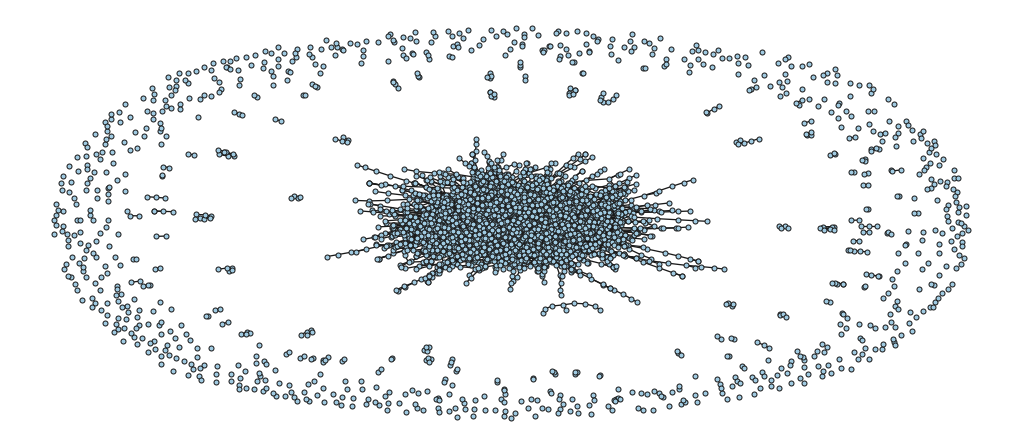

In [39]:
#Define parameters
N = 5000
p = 0.0004

# Create graph
G_er = nx.erdos_renyi_graph(n = N, p = p, seed=np.random)

# Plotting
plt.figure(figsize = (14,6))
nx.draw_spring(
    G = G_er, 
    node_size = 25, 
    node_color = '#A0CBE2', 
    node_shape = 'o',
    edge_color = 'k',
    with_labels = False, 
    width = 1.3, 
    edgecolors='k') 
plt.draw()

From the plot it is apparent that the graph is indeed in the supercrital regime comparing to [1, image 3.7]. This graph can be summarized of the following sizes of connected components:

In [40]:
# Extract all connected components
ccs = sorted(nx.connected_components(G_er), key = len, reverse = True)

# Count number of nodes in each
num_connected = np.array([len(cc) for cc in ccs])
values, counts = np.unique(num_connected, return_counts = True)

# Print results
['There is/are {} component(s) with {} node(s)'.format(count, value-1) for value, count in zip(values, counts)]

['There is/are 676 component(s) with 0 node(s)',
 'There is/are 74 component(s) with 1 node(s)',
 'There is/are 22 component(s) with 2 node(s)',
 'There is/are 15 component(s) with 3 node(s)',
 'There is/are 6 component(s) with 4 node(s)',
 'There is/are 2 component(s) with 5 node(s)',
 'There is/are 3 component(s) with 6 node(s)',
 'There is/are 1 component(s) with 7 node(s)',
 'There is/are 1 component(s) with 8 node(s)',
 'There is/are 1 component(s) with 3969 node(s)']

Now the average degree of the nework is found

In [41]:
avg_degre_ba = np.array(list(dict(G_er.degree).values())).mean()
print('The average degree of the Erdős–Rényi with 5000 nodes and probobiltiy 0.0004 is {}.'.format(avg_degre_ba))

The average degree of the Erdős–Rényi with 5000 nodes and probobiltiy 0.0004 is 2.024.


It is not far from the expected 1.9996, but it is not unexpected that the exact expected value is not obtained as the Erdős–Rényi is stochastic. However, the Erdős–Rényi network is radically different from the Barabási–Albert network in terms of degree distribution. In the two cell below is the minimum degree and maximum degree shown along with two plots showing the distribution on both the linear and on the log scale.

In [42]:
# Calculate minimum and maximum degree and print results
minD = np.min(np.min([v for k,v in G_er.degree]))
maxD = np.max(np.max([v for k,v in G_er.degree]))
print(f"The minimum degree is {minD} and the maximum degree is {maxD}.")

The minimum degree is 0 and the maximum degree is 8.


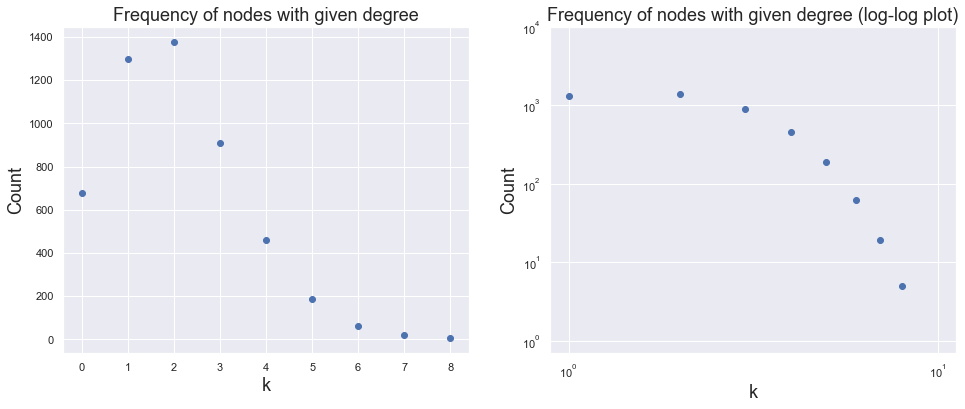

In [43]:
# Bin the distribution
v = np.arange(minD, maxD+2) - 0.5
counts = np.histogram([v for k,v in G_er.degree], bins = v)[0]

# Initialize plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (16,6))

#Nonlog
ax1.scatter(x = v[:-1]+0.5, y = counts)
ax1.set_title("Frequency of nodes with given degree", fontsize = 18)
ax1.set_xlabel("k", fontsize = 18)
ax1.set_ylabel("Count", fontsize = 18)

#log
ax2.scatter(x = v[:-1]+0.5, y = counts)
ax2.set_title("Frequency of nodes with given degree (log-log plot)", fontsize = 18)
ax2.set_xlabel("k", fontsize = 18)
ax2.set_ylabel("Count", fontsize = 18)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim(bottom=0.7, top=10**4)

plt.show()

From these two plots it is particularly clear that that the degree distribution differs when compared to the distribution plot of Barabási–Albert from Part 4. 

The reason is that the two networks are created in two different ways. 
1. The Erdos-Renyi $N$ nodes are assigned and then each pair is connected with a probability p. The consequence is that no one node will tend to have a much higher degree than any other node. In this example, the node with the largest degree is 10 and the smallest with 0.
1. The Barabási–Albert is created with a small set of connected nodes (in our example 2 nodes). Then one node is added at a time till we reach 5000. But here the node will connect to one and only one other node with probability proportional to the degree of the existing nodes. The result is that the node with a higher degree tends to bind new nodes. In the example from this notebook, the minimum degree of the Barabási–Albert is 1 and the maximum degree is 191. Much higher degree than we obtained with the Erdos-Renyi graph.

Now lets explore the friendship paradox in Erdos Renyi graph. In this context only the giant connected component will be investigated. This can be accessed as the first element in the list `css` created before as it is sorted by the number of nodes in each component (this was also done in part 2).

In [44]:
# Extract the giant connected component.
gcc = G_er.subgraph(ccs[0]).copy()

n = 1000
num_of_friends = np.zeros(n)
num_of_friends_friends = np.zeros(n)

randoms = np.random.choice(np.array(list(gcc.nodes)), size = n)

# Count friends friends
for i, r in enumerate(randoms):    
    num_of_friends[i], num_of_friends_friends[i] = friends_friends(node = r, graph = gcc)

# Print results
print('In {} out of 1000 times a node has more neighbours than the neighbours neighbours have on average.'
      .format((num_of_friends > num_of_friends_friends).sum()))
print('\nIn {} out of 1000 times a node has exactly the same number of neighbours that the neighbours neighbours have on average.'
      .format((num_of_friends == num_of_friends_friends).sum()))
print('\nIn {} out of 1000 time a node has fever neighbours than the neighbours neighbours have on average.'
      .format((num_of_friends < num_of_friends_friends).sum()))

In 293 out of 1000 times a node has more neighbours than the neighbours neighbours have on average.

In 93 out of 1000 times a node has exactly the same number of neighbours that the neighbours neighbours have on average.

In 614 out of 1000 time a node has fever neighbours than the neighbours neighbours have on average.


From the empirical result of 61.4%, it can be seen that the friendship paradox seems to be true for this graph as well It is verified with the p-value below:

In [45]:
# Calculate p-value
1 - binom.cdf((num_of_friends < num_of_friends_friends).sum(), 1000, 0.5)

1.7541523789077473e-13

Even though it is now greater than the machine epsilon it can be concluded that there is very large significance for the friendship paradox being true.

The reason for this is that degree distribution has a heavy tail. However, this is not necessarily the case for Erdos-Renyi  model as the network approaches the fully connected regime the degree distribution becomes more and more normal cf. the Central Limit Theorem.

With a degree distribution that tends towards normal the friendship paradox stops. This is illustrated empirically in the cells below. $N=5000$ is stille true but now $\langle k \rangle = \log(N) + 1000$ and on average each node is connected to around 20% of all other nodes. Thus the graph is by far in the fully Connected Regime.

In [46]:
N = 5000
G_er_fully_connected = nx.erdos_renyi_graph(n = N, p = (np.log(N)+1000)/(N-1), seed=np.random)

Below is the degree distribution plotted. Note how close the resample is to the normal distribution.

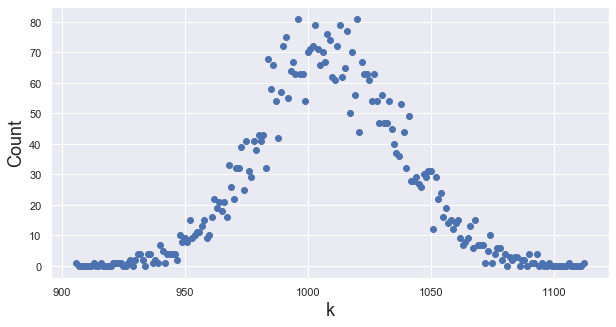

In [47]:
# Bin the distribution
minD = np.min(np.min([v for k,v in G_er_fully_connected.degree]))
maxD = np.max(np.max([v for k,v in G_er_fully_connected.degree]))

v = np.arange(minD, maxD+2)-0.5
counts = np.histogram([v for k,v in G_er_fully_connected.degree], bins = v)[0]

plt.figure(figsize=(10,5))
plt.scatter(x = v[:-1]+0.5, y = counts)
ax2.set_title("Frequency of nodes with given degree (log-log plot)")
plt.xlabel("k", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.show()

As it can be seen that distribution looks very normal without skewness. Now the friend friens experiment is performed again with the fully connected graph.

In [48]:
n = 1000
num_of_friends = np.zeros(n)
num_of_friends_friends = np.zeros(n)

randoms = np.random.choice(np.array(list(gcc.nodes)), size = n)

# Count friends friends
for i, r in enumerate(randoms):    
    num_of_friends[i], num_of_friends_friends[i] = friends_friends(node = r, graph = G_er_fully_connected)

# Print results
print('In {} out of 1000 times a node has more neighbours than the neighbours neighbours have on average.'
      .format((num_of_friends > num_of_friends_friends).sum()))
print('\nIn {} out of 1000 times a node has exactly the same number of neighbours that the neighbours neighbours have on average.'
      .format((num_of_friends == num_of_friends_friends).sum()))
print('\nIn {} out of 1000 time a node has fever neighbours than the neighbours neighbours have on average.'
      .format((num_of_friends < num_of_friends_friends).sum()))

In 478 out of 1000 times a node has more neighbours than the neighbours neighbours have on average.

In 0 out of 1000 times a node has exactly the same number of neighbours that the neighbours neighbours have on average.

In 522 out of 1000 time a node has fever neighbours than the neighbours neighbours have on average.


Now it is much closer to a 50/50. The p-value is once again assessed:

In [49]:
# Calculate p-value
1 - binom.cdf((num_of_friends < num_of_friends_friends).sum(), 1000, 0.5)

0.07734685323996915

Now it is also insignificant using a 5% significans level.

The reason is that number of friends is evenly spread around the average and there is no skewed tail. This is similar to looking at the height of people. Here it would be more naturally on average that half of one's friends are taller and the other half shorter.

### Sources
[1] Saeidinia, Reza & Barabási, Albert-László. (2017). Network Science: Albert-Laszlo Barabasi